In [1]:
import json
from collections import defaultdict

Create a mapping of class number/index to name

In [2]:
class_num_to_name = {}
with open("../../summit-data/data/imagenet.json", "r") as json_file:
    imagenet = json.load(json_file)
    for data in imagenet:
        target_class = data['target_class']
        name = data['name']
        class_num_to_name[int(target_class)] = name

In [3]:
class_num_to_name[1]

'goldfish'

In [4]:
data_path = "../../summit-data/data/ag/"

In [5]:
file_name = "ag-0.json"
with open(data_path + file_name, "r") as json_file:
    data = json.load(json_file)
    print(data["mixed5b"][0])

{'channel': 5, 'count': 146, 'layer': 'mixed5b', 'pagerank': 0.0005482130497132194, 'prev_channels': [{'prev_channel': 11, 'inf': 95}, {'prev_channel': 601, 'inf': 859}, {'prev_channel': 665, 'inf': 287}, {'prev_channel': 158, 'inf': 969}], 'attr_channels': [{'prev_channel': '776', 'inf': 1274}, {'prev_channel': '158', 'inf': 969}, {'prev_channel': '601', 'inf': 859}]}


Generate a mapping of layer -> neuron -> top classes for that neuron

In [6]:
top_classes_for_neurons = {}
for i in range(0, 1000):
    file_name = "ag-{0}.json".format(i)
    with open(data_path + file_name, "r") as json_file:
        data = json.load(json_file)
        class_name = class_num_to_name[i]
        
        for layer in data:
            if layer not in top_classes_for_neurons:
                top_classes_for_neurons[layer] = {}

            layer_obj = data[layer]
            for neuron in layer_obj:
                channel = neuron['channel']
                pagerank = neuron['pagerank']
                
                if channel not in top_classes_for_neurons[layer]:
                    top_classes_for_neurons[layer][channel] = []
                    
                top_classes_for_neurons[layer][channel].append((class_name, pagerank))

In [7]:
top_classes_for_neurons['mixed4b'][409]

[('koala', 0.0018479396745814923),
 ('chihuahua', 0.0014544777785634477),
 ('maltese_dog', 0.002168001154028085),
 ('shih-tzu', 0.0016978015384358169),
 ('blenheim_spaniel', 0.0016001425583442867),
 ('papillon', 0.0016368776631234603),
 ('basset', 0.001717762752257799),
 ('beagle', 0.0015674342565984481),
 ('norwegian_elkhound', 0.0013758156329761976),
 ('weimaraner', 0.0017123057295702114),
 ('american_staffordshire_terrier', 0.001405846563376834),
 ('border_terrier', 0.0017120959497473572),
 ('norfolk_terrier', 0.0018717716778385515),
 ('norwich_terrier', 0.001506763206968527),
 ('yorkshire_terrier', 0.0018607120247967556),
 ('cairn', 0.0014017600539935732),
 ('australian_terrier', 0.0015986075902657021),
 ('dandie_dinmont', 0.0019859500217109284),
 ('boston_bull', 0.0017241136025204272),
 ('miniature_schnauzer', 0.0018441003213124827),
 ('tibetan_terrier', 0.0018362245643842577),
 ('silky_terrier', 0.0015124034455818488),
 ('west_highland_white_terrier', 0.0016476971007551293),
 ('l

Save dictionary to JSON file

In [8]:
file_path = "../data/top_classes_for_neurons.json"
with open(file_path, "w") as out_file:
    json.dump(top_classes_for_neurons, out_file)

# Create feature vis graph

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [10]:
%matplotlib inline

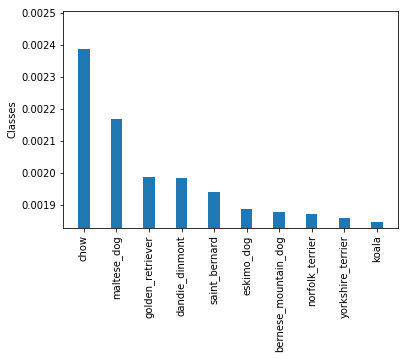

In [11]:
def top_classes_bar_chart(layer, neuron):
    top_classes = top_classes_for_neurons[layer][neuron]
    top_classes = sorted(top_classes, key=lambda c: c[1], reverse=True)[:10]
    pageranks = [pagerank for _, pagerank in top_classes]
    top_classes = [class_name for class_name, _ in top_classes]
    
    plt.bar(np.arange(10), height=pageranks, width=0.35)
#     plt.plot(pageranks)
    plt.ylabel('Classes')
    plt.xticks(np.arange(10), top_classes, rotation="vertical")
    plt.ylim(bottom=pageranks[-1] * 0.99)
    plt.show()

top_classes_bar_chart('mixed4b', 409)

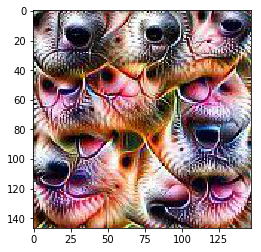

In [12]:
def display_feature_vis(layer, neuron):
    data_path = "../../summit-data/data/feature-vis/channel/"
    file_name = "{0}-{1}-channel.jpg".format(layer, neuron)
    
    
    img = mpimg.imread(data_path + file_name)
    plt.imshow(img)
    
display_feature_vis('mixed4b', 409)

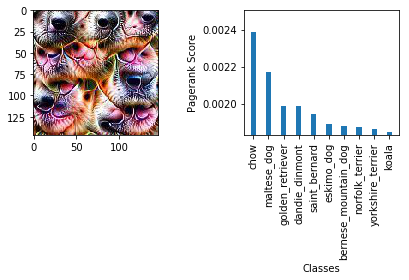

In [13]:
def plot_feature_vis_and_top_classes(layer, neuron):
    fig, axs = plt.subplots(1, 2)

    img_ax = axs[0]
    class_ax = axs[1]

    data_path = "../../summit-data/data/feature-vis/channel/"
    file_name = "{0}-{1}-channel.jpg".format(layer, neuron)


    img = mpimg.imread(data_path + file_name)
    img_ax.imshow(img)

    top_classes = top_classes_for_neurons[layer][neuron]
    top_classes = sorted(top_classes, key=lambda c: c[1], reverse=True)[:10]
    pageranks = [pagerank for _, pagerank in top_classes]
    top_classes = [class_name for class_name, _ in top_classes]
    
    plt.sca(class_ax)
    plt.bar(np.arange(10), height=pageranks, width=0.35)
    plt.xticks(np.arange(10), top_classes, rotation="vertical")
    plt.ylim(bottom=pageranks[-1] * 0.99)
    plt.ylabel('Pagerank Score')
    plt.xlabel('Classes')

    fig.tight_layout()

plot_feature_vis_and_top_classes('mixed4b', 409)
plt.show()

In [14]:
top_classes_for_neurons['mixed4b'][409]

[('koala', 0.0018479396745814923),
 ('chihuahua', 0.0014544777785634477),
 ('maltese_dog', 0.002168001154028085),
 ('shih-tzu', 0.0016978015384358169),
 ('blenheim_spaniel', 0.0016001425583442867),
 ('papillon', 0.0016368776631234603),
 ('basset', 0.001717762752257799),
 ('beagle', 0.0015674342565984481),
 ('norwegian_elkhound', 0.0013758156329761976),
 ('weimaraner', 0.0017123057295702114),
 ('american_staffordshire_terrier', 0.001405846563376834),
 ('border_terrier', 0.0017120959497473572),
 ('norfolk_terrier', 0.0018717716778385515),
 ('norwich_terrier', 0.001506763206968527),
 ('yorkshire_terrier', 0.0018607120247967556),
 ('cairn', 0.0014017600539935732),
 ('australian_terrier', 0.0015986075902657021),
 ('dandie_dinmont', 0.0019859500217109284),
 ('boston_bull', 0.0017241136025204272),
 ('miniature_schnauzer', 0.0018441003213124827),
 ('tibetan_terrier', 0.0018362245643842577),
 ('silky_terrier', 0.0015124034455818488),
 ('west_highland_white_terrier', 0.0016476971007551293),
 ('l